Total hits before filtering: 1756
Total hits after filtering: 770

Top 20 virus distribution:
virus_clean
Washington bat picornavirus                                 77
Solenopsis invicta virus                                    21
Fadolivirus algeromassiliense                               17
Biomphalaria virus                                          15
Aphid lethal paralysis virus                                13
Himetobi P virus                                            12
Kashmir bee virus                                           12
Pityohyphantes rubrofasciatus iflavirus                     11
Sacbrood virus                                              11
Drosophila C virus                                          11
Bacillus phage G                                            10
Northern red-backed vole stool-associated circular virus     9
Chicken stool-associated circular virus                      9
Lasius niger virus                                           8
parechovirus

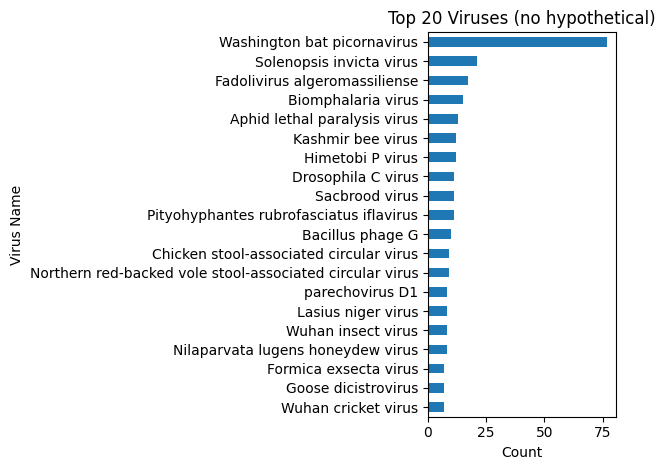

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "../data/diamond_best_hits.tsv"

df = pd.read_csv(file_path, sep="\t")


df["score_per_aa"] = df["bitscore"] / df["align_len"]

filtered = df[
    (df["align_len"] > 100) &
    (~df["stitle"].str.contains("hypothetical protein", case=False, na=False))
].copy()

print("Total hits before filtering:", len(df))
print("Total hits after filtering:", len(filtered))



#df["virus_raw"] = df["stitle"].str.extract(r"\[(.*?)\]")

#df["virus_clean"] = df["virus_raw"].str.replace(r"\s+\d+$", "", regex=True)

filtered["virus_raw"] = filtered["stitle"].str.extract(r"\[(.*?)\]")

filtered["virus_clean"] = filtered["virus_raw"].str.replace(r"\s+\d+$", "", regex=True)

virus_counts = (
    filtered["virus_clean"]
    .value_counts()
    .head(20)
)

print("\nTop 20 virus distribution:")
print(virus_counts)

plt.figure()
virus_counts.sort_values().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Virus Name")
plt.title("Top 20 Viruses (no hypothetical)")
plt.tight_layout()
plt.show()


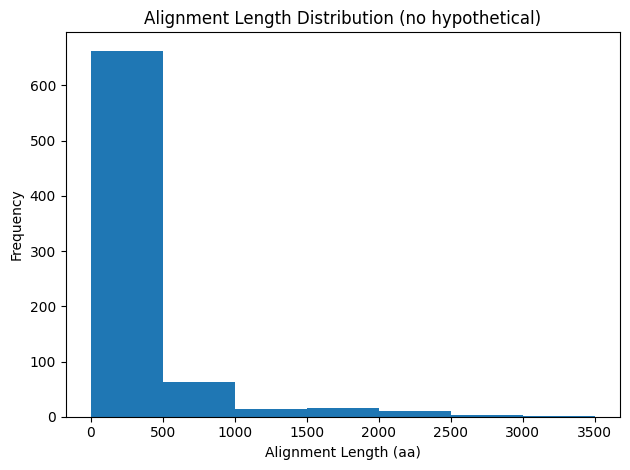

In [2]:
bin_size = 500
max_len = filtered["align_len"].max()
bins = np.arange(0, max_len + bin_size, bin_size)

plt.figure()
plt.hist(filtered["align_len"], bins=bins)
plt.xlabel("Alignment Length (aa)")
plt.ylabel("Frequency")
plt.title("Alignment Length Distribution (no hypothetical)")
plt.tight_layout()
plt.show()


In [6]:
# Case-insensitive search
pattern = r"(kobu|astro|calici|parecho)"

subset = df[df["stitle"].str.contains(pattern, case=False, regex=True, na=False)]

print("Total matches for kobu/astro/calici/parecho:", len(subset))

out_path = "diamond_kobu_astro_calici_parecho_matches.tsv"
subset.to_csv(out_path, sep="\t", index=False)

print("Saved to:", out_path)

subset.head(20)


Total matches for kobu/astro/calici/parecho: 17
Saved to: diamond_kobu_astro_calici_parecho_matches.tsv


D:\Users\User\AppData\Local\Temp\ipykernel_9784\2810184104.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subset = df[df["stitle"].str.contains(pattern, case=False, regex=True, na=False)]


,qseqid,sseqid,pident,align_len,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen,qcovhsp,scovhsp,stitle,score_per_aa
24,SRR19115554|k141_54088/Caliciviridae/5822/1268...,YP_009552769.1,68.0,1390,437,6,5787,1624,1,1384,0.000000e+00,1886.0,5822,1761,71.5,78.6,YP_009552769.1 nonstructural polyprotein [Cule...,1.356835
106,SRR19115553|k141_8842/Avihepatovirus/2548/498-...,YP_009361997.1,46.1,853,432,12,2,2548,196,1024,3.190000e-247,754.0,2548,2207,100.0,37.6,YP_009361997.1 polyprotein [parechovirus D1],0.883939
126,SRR19115554|k141_58028/Astroviridae/5601/1902-...,YP_009664783.1,62.8,468,174,0,3593,2190,1,468,9.770000e-214,644.0,5601,470,25.1,99.6,"YP_009664783.1 non-structural polyprotein 1AB,...",1.376068
139,SRR19115553|k141_22318/Caliciviridae/2609/1347...,YP_009552769.1,50.2,725,324,8,1,2166,1069,1759,6.090000e-197,612.0,2609,1761,83.0,39.2,YP_009552769.1 nonstructural polyprotein [Cule...,0.844138
230,SRR19115553|k141_30493/Parechovirus/1315/150-2...,YP_009361997.1,49.5,444,218,3,2,1315,1412,1855,7.200000e-141,447.0,1315,2207,99.9,20.1,YP_009361997.1 polyprotein [parechovirus D1],1.006757
231,SRR19115553|k141_19280/Salivirus/676/498-657/8...,YP_009380518.1,98.6,219,3,0,2,658,1334,1552,9.970000e-144,446.0,676,2444,97.2,9.0,YP_009380518.1 polyprotein [Canine kobuvirus],2.036530
246,SRR19115553|k141_36443/Avihepatovirus/1397/116...,YP_009361997.1,46.6,444,229,4,1394,66,278,714,1.330000e-129,417.0,1397,2207,95.1,19.8,YP_009361997.1 polyprotein [parechovirus D1],0.939189
347,SRR19115554|k141_10576/Parechovirus/1048/303-3...,YP_009361997.1,44.4,347,173,5,3,1037,185,513,5.680000e-92,303.0,1048,2207,98.8,14.9,YP_009361997.1 polyprotein [parechovirus D1],0.873199
412,SRR19115554|k141_6225/Parechovirus/814/553-484...,YP_009361997.1,47.3,275,131,3,806,3,920,1187,2.510000e-80,266.0,814,2207,98.8,12.1,YP_009361997.1 polyprotein [parechovirus D1],0.967273
432,SRR19115553|k141_17971/Parechovirus/607/100-1/...,YP_009361997.1,58.1,198,83,0,595,2,1087,1284,1.260000e-78,258.0,607,2207,97.9,9.0,YP_009361997.1 polyprotein [parechovirus D1],1.303030
